In [2]:
import pandas as pd
from scipy import stats
import seaborn as sb
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [11.7, 8.27]})

In [3]:
df = pd.read_excel('./Grupo 01.xlsx')

# Center measures 🧷

In [4]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode = [round(df[i].mode(),2) for i in variables]
var_media_geo = [round(stats.gmean(df[i]),2) for i in variables]
var_media_arm = [round(stats.hmean(df[i]),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode.value()
df_variables['Media_geometrica'] = var_media_geo
df_variables['Media_armonica'] = var_media_arm
df_variables

g:\my drive\universidad\pye\projects\venv\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,Media,Mediana,Moda,Media_geometrica,Media_armonica
0,317.04,245.00,"0 220.0 Name: precio, dtype: float64",253.47,206.39
1,120.01,96.00,"0 60.0 Name: mt2, dtype: float64",103.67,91.74
2,4.65,5.00,"0 6 Name: estrato, dtype: int64",4.48,4.30
3,2.89,3.00,"0 3 Name: alcobas, dtype: int64",2.81,2.71
4,2.29,2.00,"0 2 Name: banos, dtype: int64",2.16,2.03
5,0.26,0.19,"0 0.0 Name: administracion, dtype: float64",0.00,0.00
6,185.33,133.69,0 28.08 1 74.00 2 95.00 3 159.0...,125.95,25.06


# Scatter measures

In [6]:
def fill_dataframes (string_names,dict_names):
    df_output = pd.DataFrame()
    for i in string_names:
        df_output[i] = dict_names[i]
    return df_output

Function to fill dataframes using data-structures to stored.

In [7]:
var_std = [round(df[i].std(),2) for i in variables]
var_min = [df[i].min() for i in variables]
var_max = [df[i].max() for i in variables]
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
var_var = [round(df[i].var(),2) for i in variables]
var_asi = [round(df[i].skew(),2) for i in variables]
var_kur = [round(stats.kurtosis(df[i], fisher=True),2) for i in variables]
var_range = [df[i].max() - df[i].min() for i in variables]

scattering = {
    'std': var_std,
    'min': var_min,
    'max': var_max,
    'q1': var_q1,
    'q3': var_q3,
    'var': var_var,
    'asi': var_asi,
    'kur': var_kur,
    'range': var_range,
}
scattering_columns = ['std','min','max','q1','q3','var','asi','kur','range']

df_sct = fill_dataframes(scattering_columns, scattering)
df_sct

,std,min,max,q1,q3,var,asi,kur,range
0,247.87,25.000,1700.00,160.00,380.00,61439.09,2.39,7.04,1675.000
1,74.00,26.000,500.00,72.00,140.00,5475.51,1.89,3.98,474.000
2,1.19,2.000,6.00,4.00,6.00,1.43,-0.25,-1.33,4.000
3,0.64,1.000,5.00,3.00,3.00,0.41,-0.10,1.55,4.000
4,0.78,1.000,5.00,2.00,3.00,0.61,0.76,0.83,4.000
5,0.26,0.000,2.28,0.09,0.36,0.07,2.21,10.48,2.280
6,176.53,0.149,1518.14,73.11,231.76,31164.46,2.79,12.96,1517.991


### Qualitative values 🌈

In [8]:
def acum_freq (dataframe, option):
    """

    :param dataframe: df with relative and absolute values, this function sum these values
    :param option: choose one frequency, absolute or relative
    :return: void, only add new columns
    """
    indexer = 0
    accumulated = []

    if option == 1: #opcion para obtener la frecuncia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            indexer = indexer + i
            accumulated.append(indexer)

       dataframe['Frec_absoluta_acumulada'] = accumulated

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            indexer = indexer + i
            accumulated.append(indexer)

        dataframe['Frec_relativa_acumulada'] = accumulated

def abs_freq (values):
    """

    :param values: Series with the values of our interest
    :return: new dataframe with  absolute frequency values
    """
    frec_ab = values.value_counts()
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def rel_freq (dataframe, source):
    """

    :param dataframe: df with absolute values
    :param source: Series with the total values of our interest to know they length
    :return: void, only create new column in the param df
    """
    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / len(source),3)


In [12]:
def central_m (datasource, num_variable, qul_variable):
    """

    :param datasource: dataframe from where will be extract it the columns
    :param num_variable: numeric variables used to calculate the center's measurement
    :param qul_variable: qualitative variable used to group the center's measurement
    :return: a dataframe with pretty cm shorter
    """
    try:
        var_filter = datasource[num_variable]
        df = pd.DataFrame()
        df['media'] = var_filter
        df['qualitative_index'] = datasource[qul_variable]
        gb_gateway = round(df.groupby(['qualitative_index']).mean(),2)
        gb_gateway['mediana'] = df.groupby(['qualitative_index']).median().values
        gb_gateway['mode'] = df.groupby(['qualitative_index']).agg(pd.Series.mode).values
        return gb_gateway
    except Exception:
        print(f"Something was wrong while function, {type(Exception.__name__)}")


Functions to get absolutes and relatives frequencies

In [9]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

frec_ubicacion = abs_freq(var_ubicacion)

'''Frecuencia relativa'''

rel_freq(frec_ubicacion, var_ubicacion)

'''Frecuencia absoluta acumulada'''
acum_freq(frec_ubicacion, 1)

'''Frecuencia relativa acumulada'''

acum_freq(frec_ubicacion, 2)
frec_ubicacion

,Frecuencia_absoluta,Frecuencia_relativa,Frec_absoluta_acumulada,Frec_relativa_acumulada
poblado,134,38.617,134,38.617
aburra sur,84,24.207,218,62.824
laureles,36,10.375,254,73.199
occidente,35,10.086,289,83.285
belen guayabal,34,9.798,323,93.083
centro,19,5.476,342,98.559
norte,5,1.441,347,100.000


In [ ]:
price_parking_cm = central_m(df, 'precio', 'parqueadero')

In [ ]:
mt2_ended_cm = central_m(df, 'mt2', 'terminado')

Getting rel and abs frequencies with the past functions

# Charts

Text(0.5, 1.0, 'Avaluo de los apartamentos vs sus precios de venta y estrato al que pertencen')

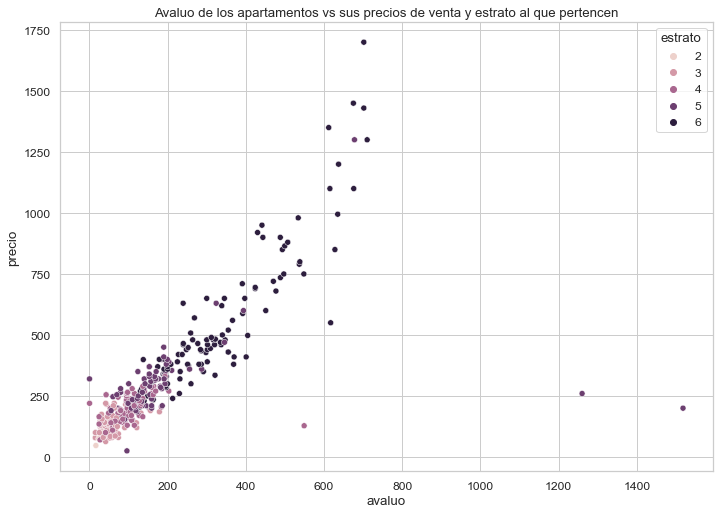

In [5]:
sb.scatterplot(x='avaluo',y='precio',data=df,hue='estrato').set_title("Avaluo de los apartamentos vs sus precios de venta y estrato al que pertencen")

Text(0.5, 1.0, 'Ubicaciones con más apartamentos terminados')

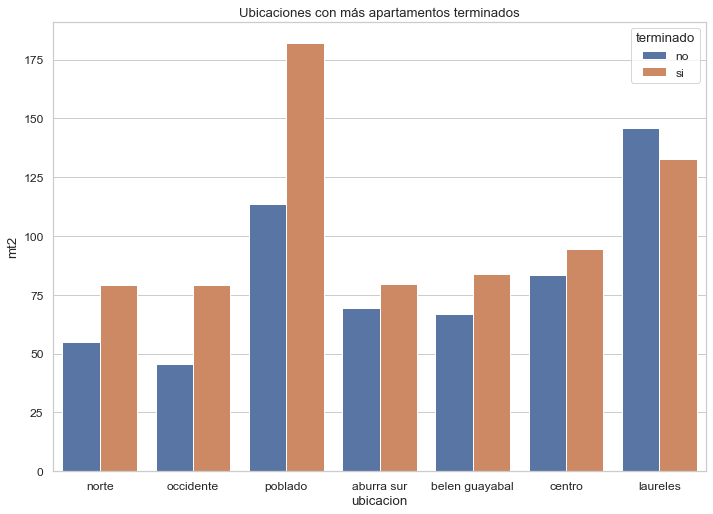

In [11]:
sb.barplot(x='ubicacion',y='mt2',hue='terminado',data=df,ci=None).set_title("Ubicaciones con más apartamentos terminados")

Function to get central measures

Text(0.5, 1.0, 'Medidas de tendecia central de los mt2 segun estado de construccion')

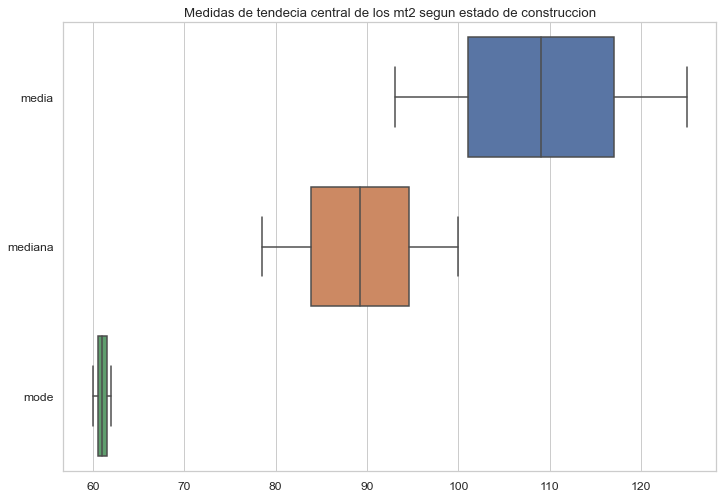

In [15]:
sb.boxplot(data=mt2_ended_cm, orient='h').set_title("Medidas de tendecia central de los mt2 segun estado de construccion")